# EVALUACIÓN FINAL MODULO 7: ANÁLISIS DE PREFERENCIAS MUSICALES A NIVEL GLOBAL

Trabajas en un centro de investigación de tendencias culturales y te han encargado un análisis sobre las preferencias musicales en distintos países. Tu tarea es aplicar técnicas de aprendizaje de máquina no supervisado para extraer patrones de escucha y agrupar países según sus similitudes en consumo musical.

# OBJETIVOS DE LA EVALUACIÓN

* Aplicar clusterización para encontrar grupos de países con patrones de escucha similares.
* Utilizar reducción de dimensionalidad para visualizar la estructura de los datos.
* Evaluar diferentes algoritmos y justificar sus ventajas y desventajas.
* Interpretar los resultados en un contexto cultural y social.

# INSTRUCCIONES

**1. Carga y exploración de datos (1 punto)**
* Carga el dataset proporcionado, que contiene información sobre la popularidad de distintos géneros musicales en países como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.
* Analiza las características del dataset, identificando distribuciones y tendencias iniciales.

**2. Aplicación de algoritmos de clusterización (5 puntos)**

K-Means:
* Aplica el algoritmo K-Means con un valor inicial de K=3.
* Determina el valor óptimo de K utilizando el método del codo y el coeficiente de silueta.

Clustering jerárquico:
* Genera un dendrograma y determina el número óptimo de clusters.
* Aplica clustering jerárquico y compara con los resultados de K-Means.

DBSCAN:
* Aplica DBSCAN con diferentes valores de eps y MinPts.
* Justifica la elección de los parámetros y analiza si DBSCAN identifica agrupaciones significativas.

**3. Aplicación de reducción de dimensionalidad (3 puntos)**

PCA:
* Aplica PCA y determina cuántos componentes principales explican al menos el 90% de la varianza.
* Visualiza los países en un gráfico bidimensional con las primeras dos componentes principales.

t-SNE:
* Aplica t-SNE para visualizar la relación entre los países en un espacio de 2D.
* Experimenta con diferentes valores de perplexity y analiza cómo afectan la representación.

**4. Análisis de resultados y conclusiones (1 punto)**

Comparación de métodos:
* Explica las diferencias entre K-Means, clustering jerárquico y DBSCAN. ¿Cuál funcionó mejor en este caso y por qué?
* Compara los resultados obtenidos con PCA y t-SNE. ¿Cuál técnica permitió visualizar mejor la relación entre los países?

Interpretación:
* ¿Los clusters obtenidos reflejan similitudes culturales o geográficas en la música?
* Relaciona los resultados con tendencias globales en consumo musical.
________________________________________________________________________________

**1. Carga y exploración de datos (1 punto)**
* Carga el dataset proporcionado, que contiene información sobre la popularidad de distintos géneros musicales en países como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.
* Analiza las características del dataset, identificando distribuciones y tendencias iniciales.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_generos_musicales.csv')
print('Dataframe')
display(df)
print('\nInformación del dataframe')
display(df.describe())
print('\nInformación de las columnas')
display(df.info())

Dataframe


,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
0,Chile,71,22,79,61,70,58,79,69
1,EEUU,34,41,40,79,74,37,90,23
2,México,91,72,52,99,83,23,63,21
3,Corea,80,21,95,34,22,79,27,25
4,Japón,40,49,77,81,70,33,66,73
5,Alemania,94,57,41,81,26,28,54,23
6,Rusia,94,21,68,66,40,72,97,73
7,Italia,43,83,78,81,92,21,55,82



Información del dataframe


,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000
mean,68.375000,45.750000,66.250000,72.750000,59.625000,43.875000,66.37500,48.625000
std,25.628876,23.980647,19.912308,19.337233,26.586449,22.680624,22.36028,27.650562
min,34.000000,21.000000,40.000000,34.000000,22.000000,21.000000,27.00000,21.000000
25%,42.250000,21.750000,49.250000,64.750000,36.500000,26.750000,54.75000,23.000000
50%,75.500000,45.000000,72.500000,80.000000,70.000000,35.000000,64.50000,47.000000
75%,91.750000,60.750000,78.250000,81.000000,76.250000,61.500000,81.75000,73.000000
max,94.000000,83.000000,95.000000,99.000000,92.000000,79.000000,97.00000,82.000000



Información de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   País         8 non-null      object
 1   Pop          8 non-null      int64 
 2   Rock         8 non-null      int64 
 3   Hip-Hop      8 non-null      int64 
 4   Electrónica  8 non-null      int64 
 5   Clásica      8 non-null      int64 
 6   Jazz         8 non-null      int64 
 7   Reguetón     8 non-null      int64 
 8   Metal        8 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 708.0+ bytes


None

**2. Aplicación de algoritmos de clusterización (5 puntos)**

K-Means:
* Aplica el algoritmo K-Means con un valor inicial de K=3.
* Determina el valor óptimo de K utilizando el método del codo y el coeficiente de silueta.

In [29]:
from sklearn.preprocessing import StandardScaler

# Preparar la data y estandarizar

df_numeric = df.drop('País', axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [30]:
from sklearn.cluster import KMeans

# Aplicar kmeans con k=3

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_scaled)
df['Cluster_k3'] = kmeans.labels_
display(df)

,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal,Cluster_k3,Cluster_Optimo,Cluster_Jerarquico,Cluster_DBSCAN
0,Chile,71,22,79,61,70,58,79,69,0,2,1,-1
1,EEUU,34,41,40,79,74,37,90,23,2,1,0,-1
2,México,91,72,52,99,83,23,63,21,2,1,0,-1
3,Corea,80,21,95,34,22,79,27,25,0,0,1,-1
4,Japón,40,49,77,81,70,33,66,73,1,3,0,-1
5,Alemania,94,57,41,81,26,28,54,23,2,1,0,-1
6,Rusia,94,21,68,66,40,72,97,73,0,2,1,-1
7,Italia,43,83,78,81,92,21,55,82,1,3,0,-1


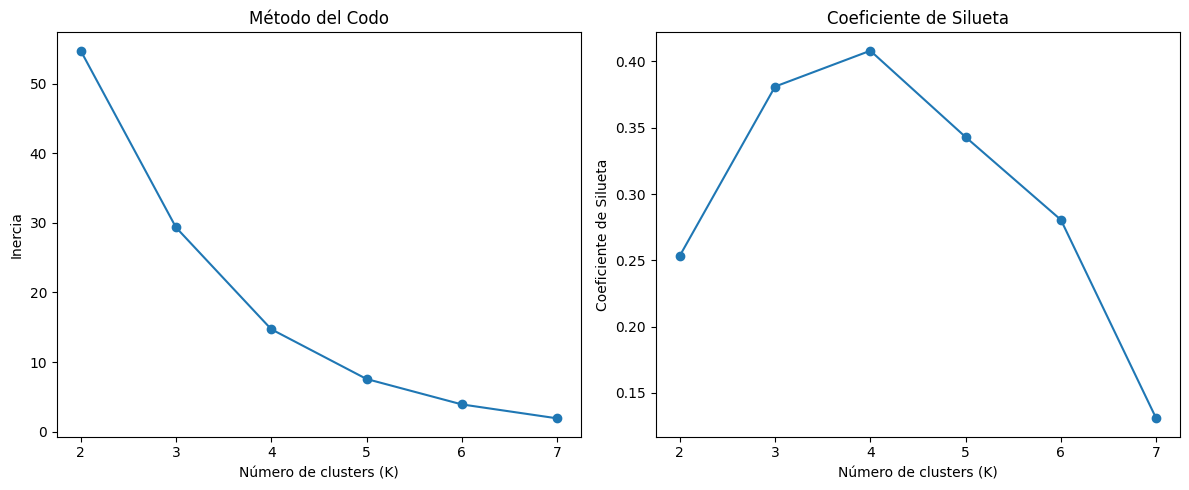


K-means óptimo k=4


,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal,Cluster_k3,Cluster_Optimo,Cluster_Jerarquico,Cluster_DBSCAN
0,Chile,71,22,79,61,70,58,79,69,0,2,1,-1
1,EEUU,34,41,40,79,74,37,90,23,1,1,0,-1
2,México,91,72,52,99,83,23,63,21,1,1,0,-1
3,Corea,80,21,95,34,22,79,27,25,2,0,1,-1
4,Japón,40,49,77,81,70,33,66,73,3,3,0,-1
5,Alemania,94,57,41,81,26,28,54,23,1,1,0,-1
6,Rusia,94,21,68,66,40,72,97,73,0,2,1,-1
7,Italia,43,83,78,81,92,21,55,82,3,3,0,-1


In [31]:
# Determinar K óptimo

from sklearn.metrics import silhouette_score

inercia = []
coeficiente_silueta = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inercia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(df_scaled, kmeans.labels_)
        coeficiente_silueta.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 8), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 8), coeficiente_silueta, marker='o')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Coeficiente de Silueta')

plt.tight_layout()
plt.show()



In [32]:
print('\nK-means óptimo k=4')

# Aplicar kmeans con k=4

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_scaled)
df['Cluster_k3'] = kmeans.labels_
display(df)


K-means óptimo k=4


,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal,Cluster_k3,Cluster_Optimo,Cluster_Jerarquico,Cluster_DBSCAN
0,Chile,71,22,79,61,70,58,79,69,0,2,1,-1
1,EEUU,34,41,40,79,74,37,90,23,1,1,0,-1
2,México,91,72,52,99,83,23,63,21,1,1,0,-1
3,Corea,80,21,95,34,22,79,27,25,2,0,1,-1
4,Japón,40,49,77,81,70,33,66,73,3,3,0,-1
5,Alemania,94,57,41,81,26,28,54,23,1,1,0,-1
6,Rusia,94,21,68,66,40,72,97,73,0,2,1,-1
7,Italia,43,83,78,81,92,21,55,82,3,3,0,-1


Clustering jerárquico:
* Genera un dendrograma y determina el número óptimo de clusters.
* Aplica clustering jerárquico y compara con los resultados de K-Means.


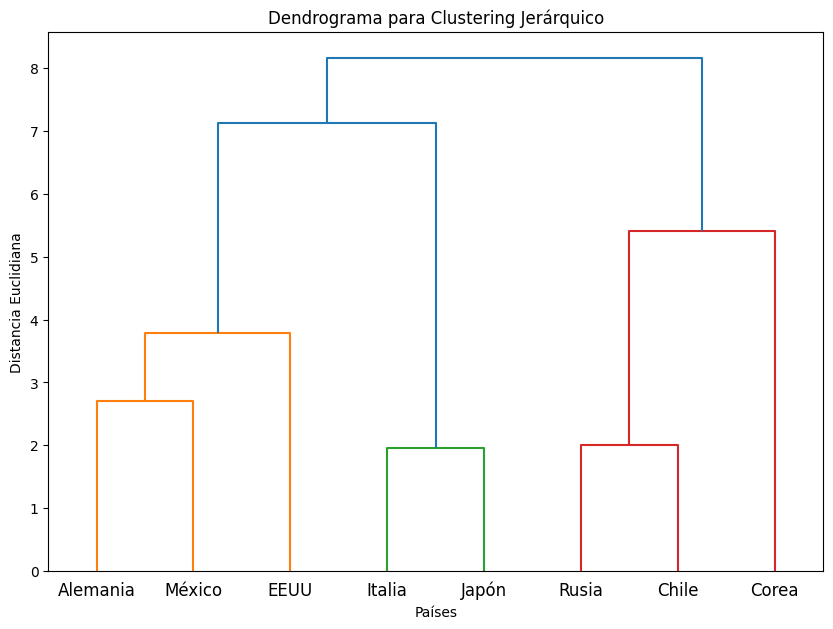

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar el dendrograma
linked = linkage(df_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df['País'].tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Países')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

n_clusters_hierarchical = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
df['Cluster_Jerarquico'] = hierarchical_clustering.fit_predict(df_scaled)

print(f"Clustering Jerárquico con {n_clusters_hierarchical} clusters:")
display(df[['País', 'Cluster_k3', 'Cluster_Optimo', 'Cluster_Jerarquico']])

Clustering Jerárquico con 3 clusters:


,País,Cluster_k3,Cluster_Optimo,Cluster_Jerarquico
0,Chile,0,2,0
1,EEUU,1,1,1
2,México,1,1,1
3,Corea,2,0,0
4,Japón,3,3,2
5,Alemania,1,1,1
6,Rusia,0,2,0
7,Italia,3,3,2


DBSCAN:
* Aplica DBSCAN con diferentes valores de eps y MinPts.
* Justifica la elección de los parámetros y analiza si DBSCAN identifica agrupaciones significativas.

Para conjuntos de datos pequeños, se recomienda probar valores bajos para MinPts (por ejemplo, 2, 3, 4) y experimentar con eps.


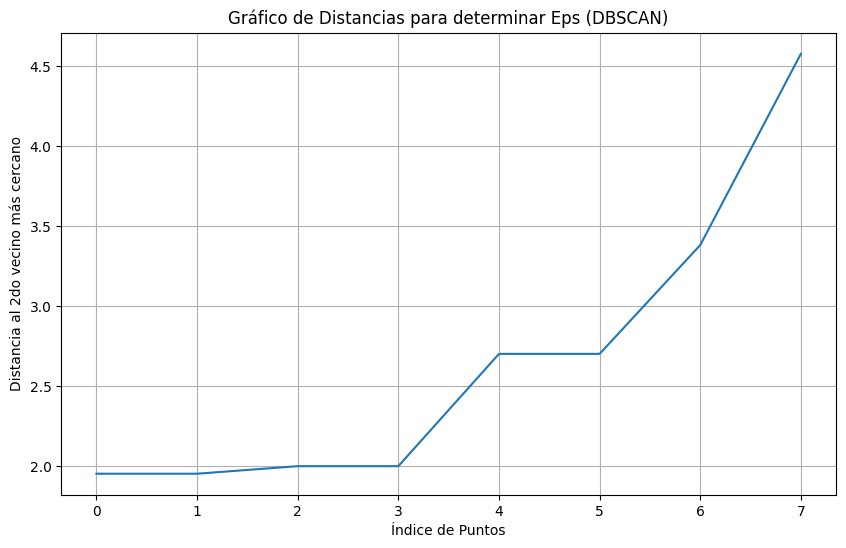


Resultados de DBSCAN con eps=3.0 y MinPts=2


,País,Cluster_k3,Cluster_Optimo,Cluster_Jerarquico,Cluster_DBSCAN
0,Chile,0,2,0,-1
1,EEUU,1,1,1,-1
2,México,1,1,1,-1
3,Corea,2,0,0,-1
4,Japón,3,3,2,0
5,Alemania,1,1,1,-1
6,Rusia,0,2,0,-1
7,Italia,3,3,2,0


Resultados de DBSCAN con eps=2.5 y MinPts=2


,País,Cluster_k3,Cluster_Optimo,Cluster_Jerarquico,Cluster_DBSCAN
0,Chile,0,2,0,0
1,EEUU,1,1,1,-1
2,México,1,1,1,-1
3,Corea,2,0,0,-1
4,Japón,3,3,2,1
5,Alemania,1,1,1,-1
6,Rusia,0,2,0,0
7,Italia,3,3,2,1


Resultados de DBSCAN con eps=3.0 y MinPts=2


,País,Cluster_k3,Cluster_Optimo,Cluster_Jerarquico,Cluster_DBSCAN
0,Chile,0,2,0,0
1,EEUU,1,1,1,-1
2,México,1,1,1,-1
3,Corea,2,0,0,-1
4,Japón,3,3,2,1
5,Alemania,1,1,1,-1
6,Rusia,0,2,0,0
7,Italia,3,3,2,1


In [53]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Calcular la distancia al k-ésimo vecino más cercano para MinPts = 2 * número de dimensiones
# Aquí, el número de dimensiones es el número de columnas numéricas.
num_dimensions = df_scaled.shape[1]
# min_samples = 2 * num_dimensions # This was causing an error for small datasets
# print(f"Sugerencia para MinPts: {min_samples}")

# For small datasets, choose a small min_samples value and experiment with eps
print("Para conjuntos de datos pequeños, se recomienda probar valores bajos para MinPts (por ejemplo, 2, 3, 4) y experimentar con eps.")

neighbors = NearestNeighbors(n_neighbors=2) # partir con número pequeño
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Ordenar las distancias y graficar
distances = np.sort(distances[:, 1], axis=0) # Usar distancia del 2do neighbor

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Gráfico de Distancias para determinar Eps (DBSCAN)')
plt.xlabel('Índice de Puntos')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.grid(True)
plt.show()

dbscan_202 = DBSCAN(eps=2.0, min_samples=2)
df['Cluster_DBSCAN'] = dbscan_202.fit_predict(df_scaled) # Removed \n

print(f"\nResultados de DBSCAN con eps=3.0 y MinPts=2")
display(df[['País', 'Cluster_k3', 'Cluster_Optimo', 'Cluster_Jerarquico', 'Cluster_DBSCAN']])

dbscan_252 = DBSCAN(eps=2.5, min_samples=2)
df['Cluster_DBSCAN'] = dbscan_252.fit_predict(df_scaled) # Removed \n

print(f"Resultados de DBSCAN con eps=2.5 y MinPts=2")
display(df[['País', 'Cluster_k3', 'Cluster_Optimo', 'Cluster_Jerarquico', 'Cluster_DBSCAN']])

dbscan_302 = DBSCAN(eps=2.5, min_samples=2)
df['Cluster_DBSCAN'] = dbscan_302.fit_predict(df_scaled) # Removed \n

print(f"Resultados de DBSCAN con eps=3.0 y MinPts=2")
display(df[['País', 'Cluster_k3', 'Cluster_Optimo', 'Cluster_Jerarquico', 'Cluster_DBSCAN']])

**3. Aplicación de reducción de dimensionalidad (3 puntos)**

PCA:
* Aplica PCA y determina cuántos componentes principales explican al menos el 90% de la varianza.
* Visualiza los países en un gráfico bidimensional con las primeras dos componentes principales.

Número de componentes principales que explican al menos el 90% de la varianza: 4


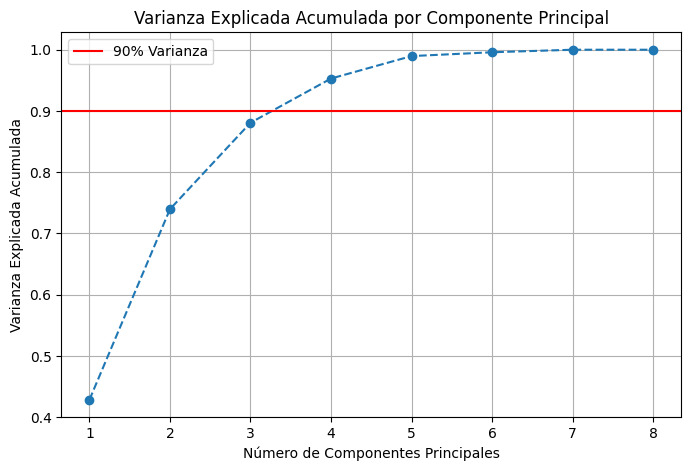

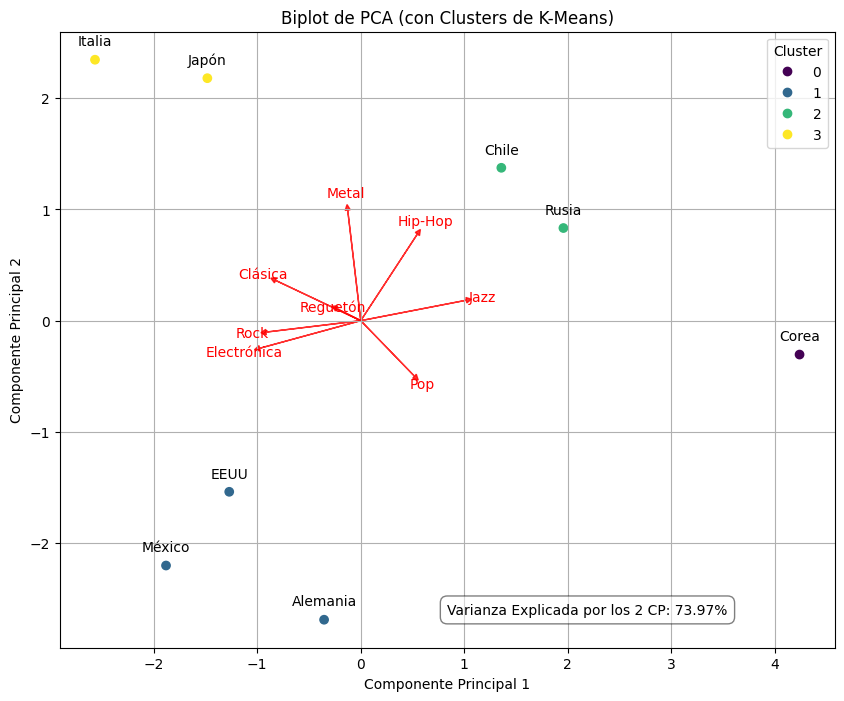

In [77]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Determinar cuántos componentes explican el 90% de la varianza
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

n_components_90 = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

print(f"Número de componentes principales que explican al menos el 90% de la varianza: {n_components_90}")

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Varianza')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.show()

# Crear un Biplot para visualizar los países en un gráfico bidimensional con las primeras dos componentes principales
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

# Los loadings son los vectores propios (eigenvectors)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots(figsize=(10, 8))

# Graficar los puntos de los países
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster_Optimo'], cmap='viridis')

# Añadir etiquetas de los países
for i, country in enumerate(df['País']):
    ax.annotate(country, (df_pca[i, 0], df_pca[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Graficar las flechas de las variables originales (géneros musicales)
# Select only the original musical genre columns
original_features = ['Pop', 'Rock', 'Hip-Hop', 'Electrónica', 'Clásica', 'Jazz', 'Reguetón', 'Metal']
for i, col in enumerate(original_features):
    # Find the index of the original feature in the scaled data
    original_feature_index = df_numeric.columns.get_loc(col)
    ax.arrow(0, 0, loadings[original_feature_index, 0], loadings[original_feature_index, 1], color='r', alpha=0.8, head_width=0.05, head_length=0.05)
    ax.text(loadings[original_feature_index, 0] * 1.15, loadings[original_feature_index, 1] * 1.15, col, color='r', ha='center', va='center')


# Añadir texto con la varianza explicada por las dos primeras componentes
explained_variance_2_components = pca.explained_variance_ratio_.sum() * 100
ax.text(0.5, 0.05, f'Varianza Explicada por los 2 CP: {explained_variance_2_components:.2f}%', transform=ax.transAxes, fontsize=10, verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))


ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Biplot de PCA (con Clusters de K-Means)')
ax.grid()
ax.legend(*scatter.legend_elements(), title='Cluster')

plt.show()

t-SNE:
* Aplica t-SNE para visualizar la relación entre los países en un espacio de 2D.
* Experimenta con diferentes valores de perplexity y analiza cómo afectan la representación.

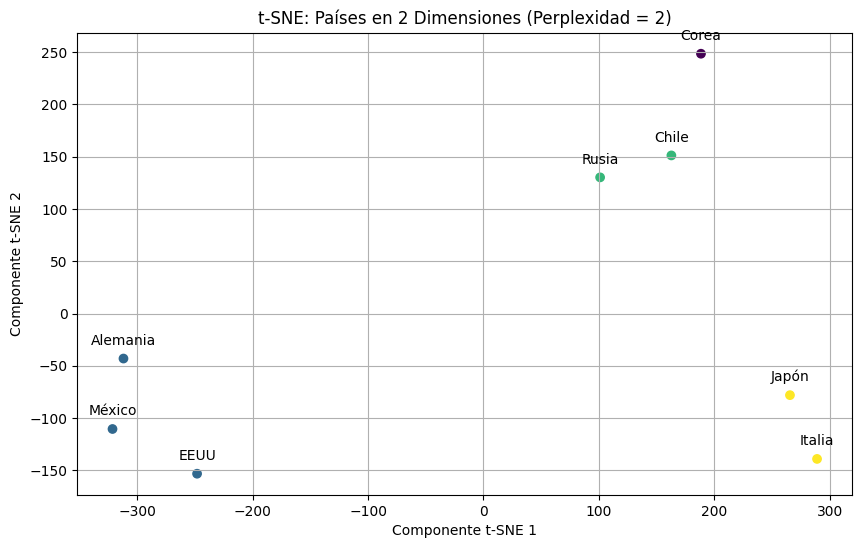

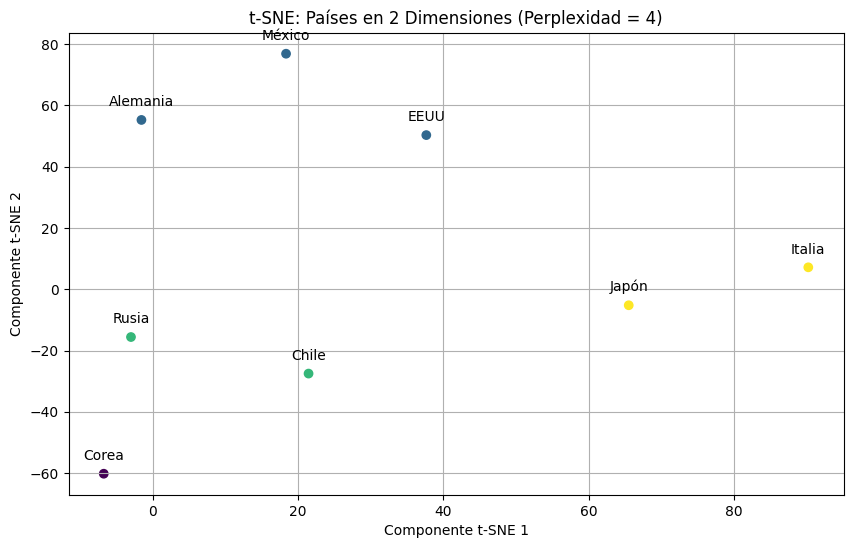

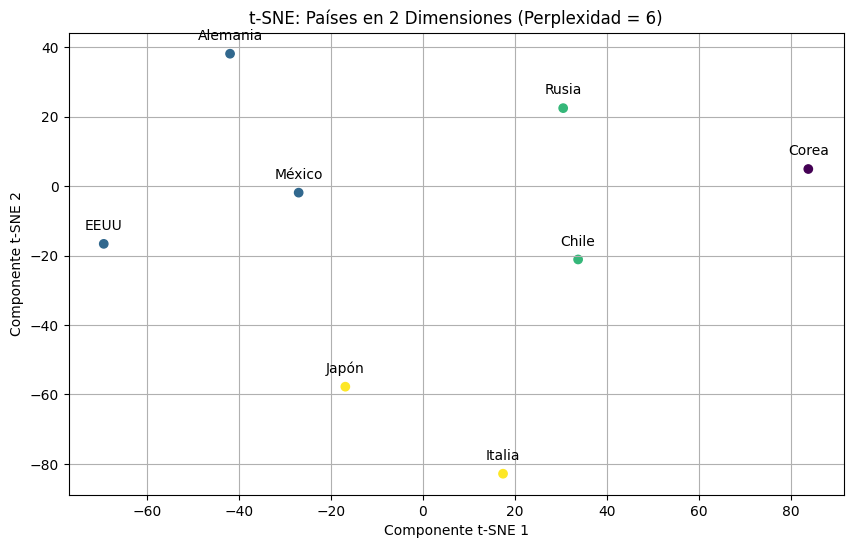

In [74]:
from sklearn.manifold import TSNE

# Aplicar t-SNE con un perplexity inicial

perplexity_values = [2, 4, 6]

for perplexity in perplexity_values:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    df_tsne = tsne.fit_transform(df_scaled)

# Visualizar los resultados de t-SNE
    plt.figure(figsize=(10, 6))
    plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df['Cluster_Optimo'], cmap='viridis') # usando cluster óptimos de K-means
    plt.title(f't-SNE: Países en 2 Dimensiones (Perplexidad = {perplexity})')
    plt.xlabel('Componente t-SNE 1')
    plt.ylabel('Componente t-SNE 2')

# Visualizar resultados

    for i, country in enumerate(df['País']):
        plt.annotate(country, (df_tsne[i, 0], df_tsne[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.grid(True) # Ensure grid is shown for each plot
    plt.show()

* Compara los resultados obtenidos con PCA y t-SNE. ¿Cuál técnica permitió visualizar mejor la relación entre los países?

PCA permitió mostrar de manera más adecuada las similitudes entre los distintos países, sin embargo t-SNE perplexity=6 ofreció un resultado bastante similar. Sin embargo PCA biplot permite mostrar de mejor manera los géneros que influyen en la posición de cada país. Además PCA funciona mejor con dataset pequeños como el que estamos trabajando.

Interpretación:
* **¿Los clusters obtenidos reflejan similitudes culturales o geográficas en la música?**

K-Means (K=4):
* Cluster 0: Corea
* Cluster 1: Alemania, EEUU, México
* Cluster 2: Chile, Rusia
* Cluster 3: Italia, Japón


Clustering Jerárquico (K=3):
* Cluster 0: Alemania, EEUU, México, Rusia, Chile
* Cluster 1: Corea
* Cluster 2: Italia, Japón

Segùn esto, geográficamente hablando, no se observan muchas similitudes geográficas. Corea y Japón por ejemplo tienen gustos muy diferentes, a pesar de estar muy cerca, mientras que Chile y Rusia tienen gustos similares a pesar de estar muy lejos.

Por otro lado hay una cierta similitud en el cluster 1 de k-means, que son países occidentales. pero culturas diferentes pueden tener gustos similares.


* **Relaciona los resultados con tendencias globales en consumo musical.**

Analizando el Biplot de PCA (donde las flechas representan los géneros musicales): Podemos ver qué géneros musicales tiran de los países hacia ciertas direcciones en el gráfico. Por ejemplo:

* EEUU, México y Alemania (Cluster 1 de K-Means) parecen tener una mayor afinidad por géneros como Pop y Electrónica, y quizás Reguetón (especialmente EEUU y México).
* Corea (Cluster 0 de K-Means) se distingue por un alto gusto por el Hip-Hop y tal vez Pop.
* Chile y Rusia (Cluster 2 de K-Means) parecen tener preferencias por Reguetón, Hip-Hop y Metal.
* Italia y Japón (Cluster 3 de K-Means) parecen tener una mayor afinidad por Metal, Electrónica, Clásica, Rock y Pop.
